<h1 align=center>Modified Model with Different Features (v.1)</h1>
<h2 align=center>Ben Bland</h2>

In [13]:
#Using features Body Mass Index and Blood Pressure to hopefully improve model accuracy
%matplotlib inline
import numpy as np

from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
X=diabetes.data
y=diabetes.target

#Placing dataset into a dataframe
import pandas as pd
pd.DataFrame(X, columns=['Age','Sex','BMI','BP','S1','S2','S3','S4','S5','S6']).tail()

,Age,Sex,BMI,BP,S1,S2,S3,S4,S5,S6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [14]:
#Changing the features
features = (2,3)
X = X[:, features]

In [15]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
print('X_train.shape: {}'.format(X_train.shape))
print('y_train.shape: {}'.format(y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))
print('y_test.shape: {}'.format(y_test.shape))

X_train.shape: (331, 2)
y_train.shape: (331,)
X_test.shape: (111, 2)
y_test.shape: (111,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F7AC6F198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020F7AD15B70>]], dtype=object)

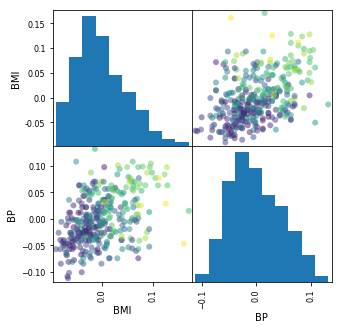

In [17]:
diabetes_dataframe = pd.DataFrame(X_train, columns=['BMI','BP'])

pd.plotting.scatter_matrix(diabetes_dataframe, c=y_train, figsize=(5,5), marker='o', hist_kwds={'bins':10})

In [18]:
#Instantiate the model with default parameters (i.e. create an instance of the model)
#This is ordinary least squares regression OLS
regr = linear_model.LinearRegression()

#Training the model (i.e. fitting the model with training data)
regr.fit(X_train,y_train)

#Printing the coefficients
print(regr.coef_)

[ 855.51017633  383.24090075]


In [21]:
#Predicting y-value based on the training data.

X_new=np.array([0.045772, 0.058750])
#Reshape the array so that NumPy can use it
X_new=np.reshape(X_new, (1,-1))
print('X_new shape: {}'.format(X_new.shape))

X_new shape: (1, 2)


In [22]:
prediction = regr.predict(X_new)
print('Prediction is: {}'.format(prediction))
print(regr.score(X_test,y_test))

Prediction is: [ 215.05593853]
0.246163148999


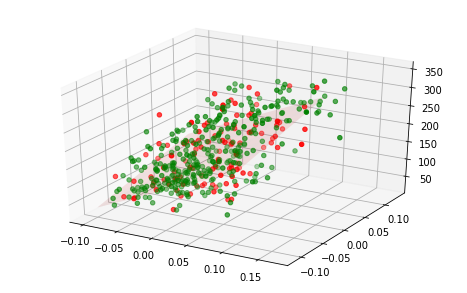

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#Define an inline function (using Lambda) with coefficient variables
#returned from the regression analysis.

coef=regr.coef_
intercept=regr.intercept_
line=lambda x1, x2: coef[0]*x1 + coef[1]*x2 + intercept

#Plotting
fig=plt.figure(figsize=(8,5))
grid_x1, grid_x2 = np.mgrid[-.1:.1:10j, -.1:.1:10j]

#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='green')
ax.scatter(X_test[:,0], X_test[:,1], y_test, facecolor='red')
ax.plot_surface(grid_x1, grid_x2, line(grid_x1,grid_x2), alpha=0.1, color='red')

#Saving the plot as a .pdf file
fig.savefig('Diabetesplot_Lab3_Modified.pdf', bbox='tight')